In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train_trip_duration.csv')

# Dataset overview

In [3]:
print("Dataset Shape:",df.shape)

Dataset Shape: (1000000, 10)


In [10]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [13]:
print("Data Info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB
Data Info: None


In [9]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,9.548850e+02
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,3.882070e+03
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,3.970000e+02
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,6.620000e+02
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,1.074000e+03
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,2.227612e+06


In [20]:
print("Number of Nan Values:\n",df.isna().sum())

Number of Nan Values:
 id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [21]:
print("Number of Null Values:\n",df.isnull().sum())

Number of Null Values:
 id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [24]:
print("Number of Null Values:",df.duplicated().sum())

Number of Null Values: 0


# Target Variable Exploration

In [25]:
df['trip_duration'].describe()

count    1.000000e+06
mean     9.548850e+02
std      3.882070e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.074000e+03
max      2.227612e+06
Name: trip_duration, dtype: float64

In [27]:
print('Minimum trip duration : ', df['trip_duration'].min())
print('Maximum trip duration : ',df['trip_duration'].max())

Minimum trip duration :  1
Maximum trip duration :  2227612


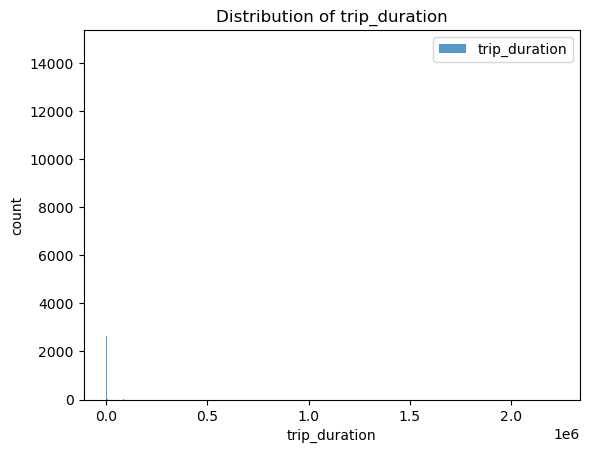

In [26]:
sns.histplot(df['trip_duration'], label='trip_duration')
plt.title('Distribution of trip_duration')
plt.xlabel('trip_duration')
plt.ylabel('count')
plt.legend()
plt.show()

### Raw Trip Duration Distribution — Key Observations

1. **Extreme Right Skewness**  
   - Most trips are concentrated near zero, but the tail extends to 2,227,612 seconds (23 days).  

2. **Unrealistic Outliers**  
   - Trips shorter than 60 seconds or longer than 6–24 hours are impossible and likely caused by data entry errors or faulty meters.  

3. **Statistical Concerns**  
   - The mean and standard deviation are inflated, and the raw distribution violates linear regression assumptions.  

4. **Modeling Impact**  
   - Training on this skewed distribution would make the model focus too much on extreme trips and reduce its ability to learn from normal trips.  

---

**Key Observation:**  
Preprocessing is essential, including filtering unrealistic values and applying transformation techniques.  


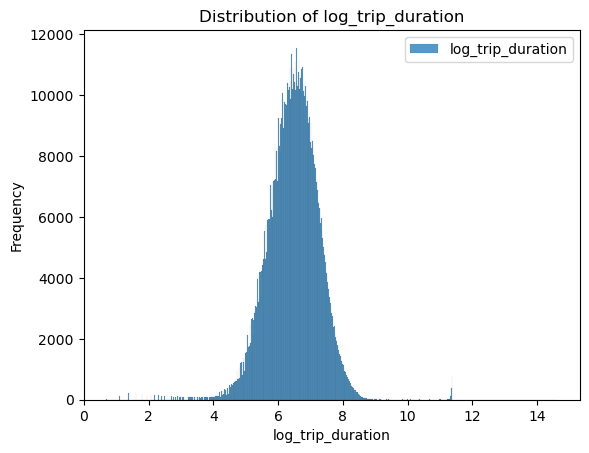

In [45]:
df['log_trip_duration']= np.log1p(df['trip_duration'])

sns.histplot(df['log_trip_duration'], label='log_trip_duration')
plt.title('Distribution of log_trip_duration')
plt.xlabel('log_trip_duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

###  Key Insights
- **Applying a log transformation changed the distribution from highly skewed to closer to normal.  
 This helps linear models perform better because they work best when features follow a more normal distribution.**
 

- **Most Trips Cluster Between log = 6–7**  
  - This corresponds to trip durations between ~6.7 minutes and ~20 minutes.  
  - These values represent typical and more logical taxi trip durations.  

- **Peak Around log ≈ 6.5**  
  - log(6.5) ≈ 665 seconds ≈ 11 minutes.  
  - informs that the most common trip duration is ~10–12 minutes.  

- **Long Right Tail**  
  - The distribution extends beyond log = 8 (~50 minutes).  
  - These represent relatively longer trips and potential outliers.  


# Datetime Features

In [ ]:
df['pickup_datetime'].describe()

In [46]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['start_hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['weekend_day']=df['day_of_week'].isin([5,6]).astype(int)
df['month']=df['pickup_datetime'].dt.month

### 1- Distribution of start hour

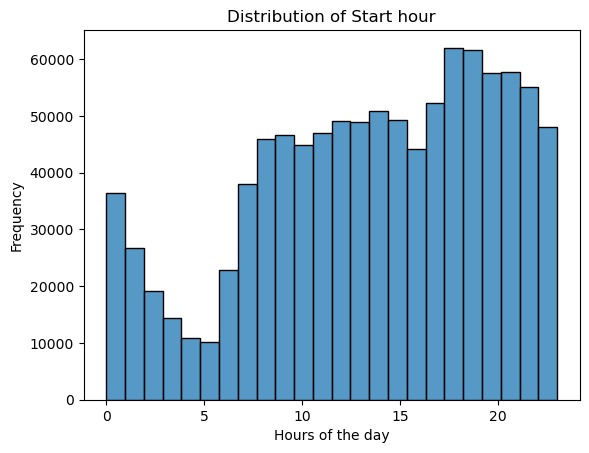

In [31]:
sns.histplot(df['start_hour'],bins=24)
plt.title('Distribution of Start hour')
plt.xlabel('Hours of the day')
plt.ylabel('Frequency')
plt.show()

### 2- Distribution of months

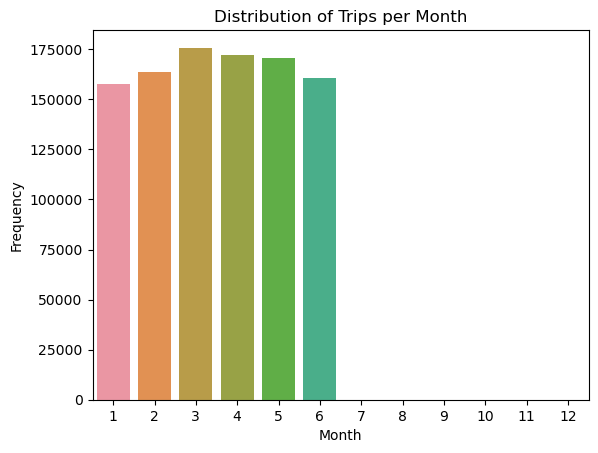

In [37]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]

sns.countplot(x='month', data=df, order=months)
plt.title("Distribution of Trips per Month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

### 3- Distribution Day of week

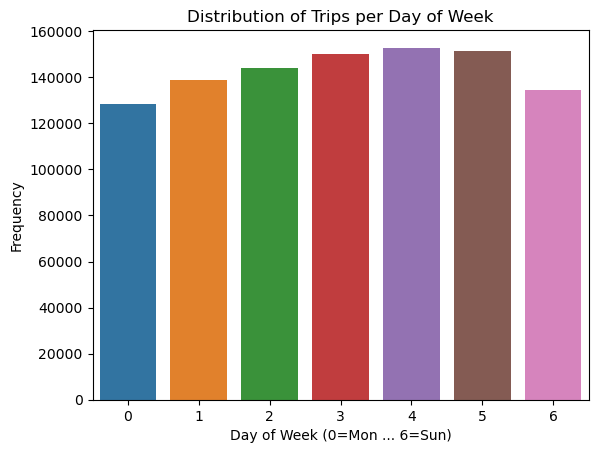

In [38]:
sns.countplot(x='day_of_week', data=df)
plt.title("Distribution of Trips per Day of Week")
plt.xlabel("Day of Week (0=Mon ... 6=Sun)")
plt.ylabel("Frequency")
plt.show()

### 4- Weekend vs Weekday

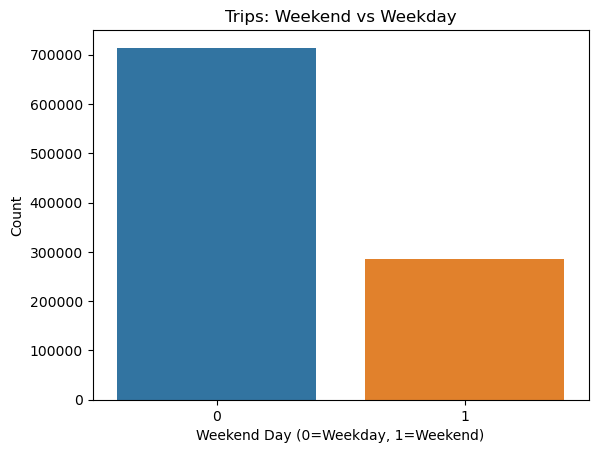

In [39]:
sns.countplot(x='weekend_day', data=df)
plt.title("Trips: Weekend vs Weekday")
plt.xlabel("Weekend Day (0=Weekday, 1=Weekend)")
plt.ylabel("Count")
plt.show()

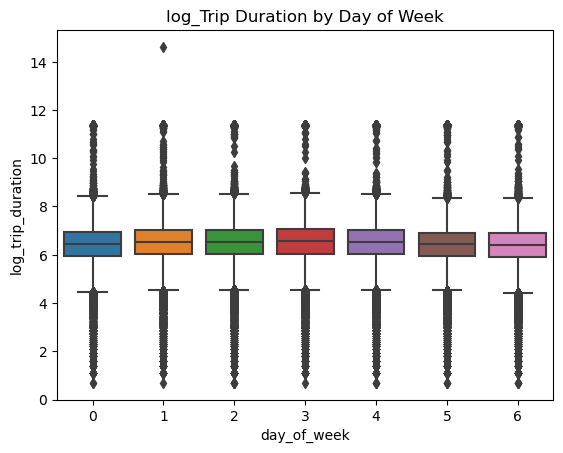

In [40]:
sns.boxplot(x='day_of_week', y='log_trip_duration', data=df)
plt.title("log_Trip Duration by Day of Week")
plt.show()


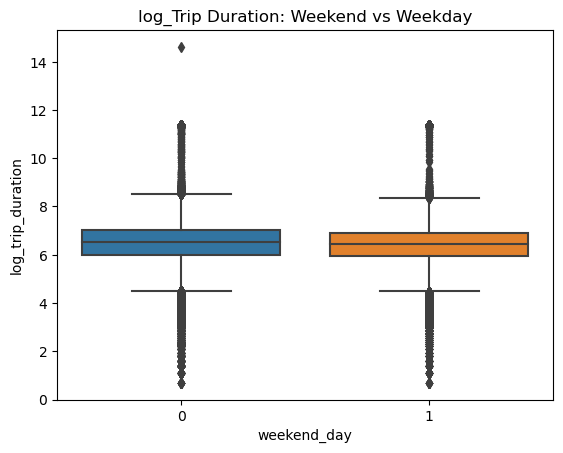

In [41]:
sns.boxplot(x='weekend_day', y='log_trip_duration', data=df)
plt.title("log_Trip Duration: Weekend vs Weekday")
plt.show()

## 5. Part of Day Feature

In [47]:
def get_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['which_part_of_day'] = df['start_hour'].apply(get_period)


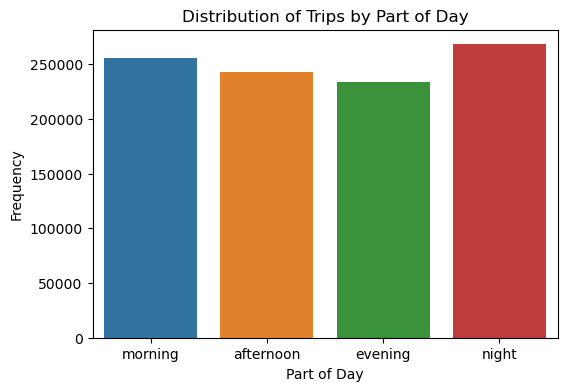

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['which_part_of_day'], order=['morning','afternoon','evening','night'])
plt.title("Distribution of Trips by Part of Day")
plt.xlabel("Part of Day")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sns.countplot(data=df, x='vendor_id')
plt.title('Distribution of trips by vendor id ')
plt.xlabel('Vendor id')
plt.ylabel('Count')
plt.show()

# Categorical Features

### 1- Vendor id

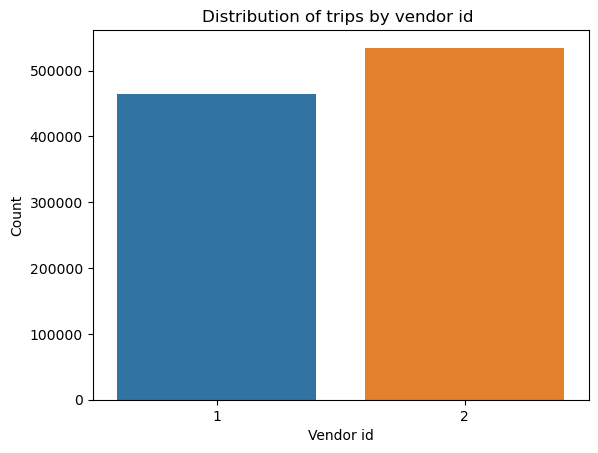

In [50]:
sns.countplot(data=df, x='vendor_id')
plt.title('Distribution of trips by vendor id ')
plt.xlabel('Vendor id')
plt.ylabel('Count')
plt.show()

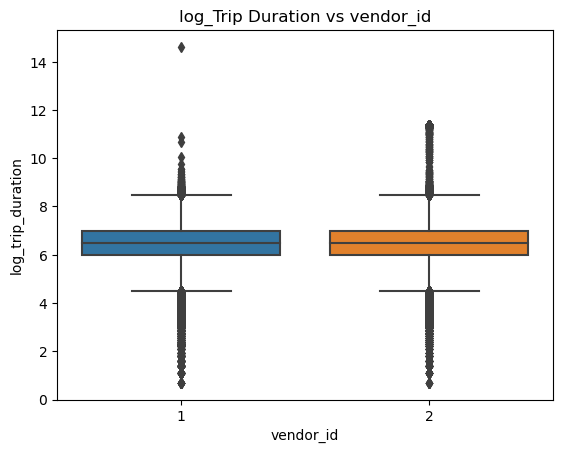

In [53]:
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df)
plt.title("log_Trip Duration vs vendor_id")
plt.show()

### Log Trip Duration vs Vendor ID  

- The distribution of log-transformed trip durations is nearly identical across both vendor IDs.  
- Both vendors show a similar median trip duration (around log 6–7, or 6–20 minutes minutes).  
- Outliers are present in both groups, including unusually short and long trips.  

**Key Observations:**  
- Vendor_id does not impact model performance.



### 2-Passenger count

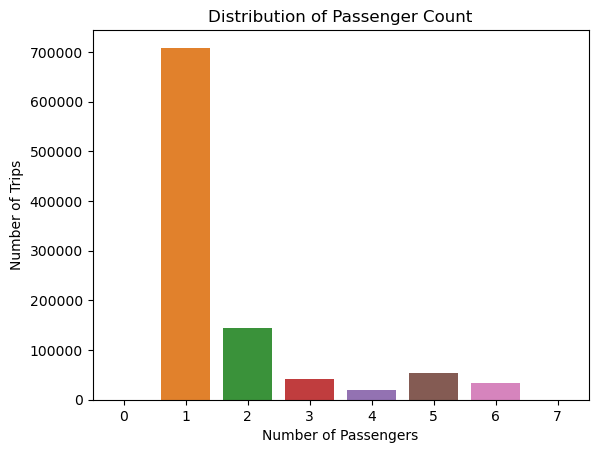

In [54]:
sns.countplot(x='passenger_count',data=df)
plt.title("Distribution of Passenger Count")
plt.xlabel("Number of Passengers")
plt.ylabel("Number of Trips")
plt.show()

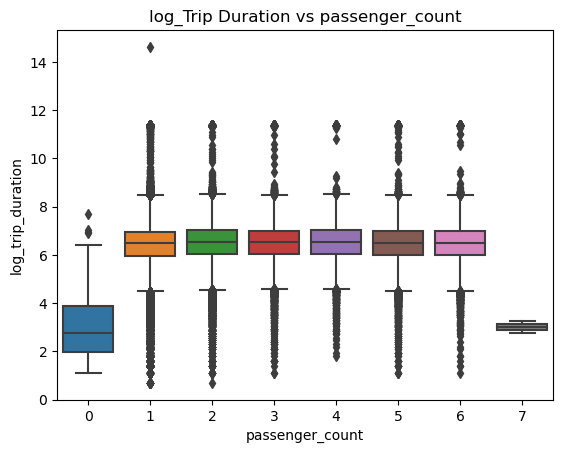

In [160]:
sns.boxplot(x='passenger_count', y='log_trip_duration', data=df)
plt.title("log_Trip Duration vs passenger_count")
plt.show()

### Analysis: Log Trip Duration vs Passenger Count  
**Passenger_count (from 1 to 6):**
- For passenger_counts 1–6, the distributions are very similar, with median log trip durations clustering around 6–7.  
- This corresponds to actual trip durations of 6–20 minutes, which aligns with the trip duration distribution and makes sense for NYC taxi rides.  

**Passenger_Count = 0:**  
- Trips with 0 passengers have a much lower median compared to other groups 
- Trips with 0 passengers do not make sense, as there cannot be a ride without passengers. These records are likely data entry errors.

**Passenger_Count = 7:**  
- Trips with 7 passengers are rare and show a very narrow distribution.  
- The small sample size makes this group unreliable and possibly noisy.  

**Key Observations:**  
- Passenger_count does not impact model performance.


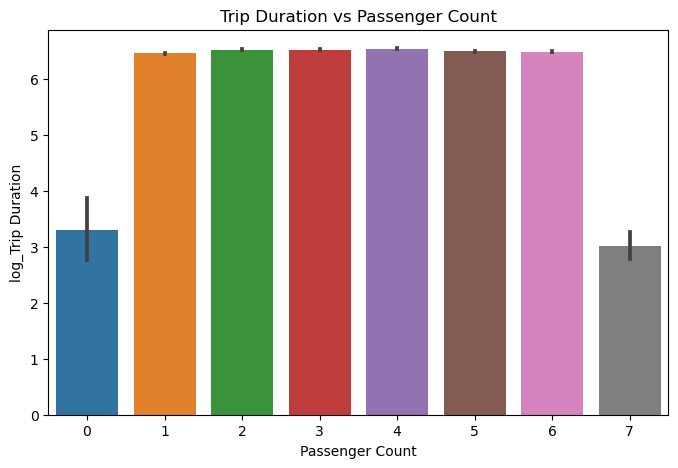

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, 
            x="passenger_count", 
            y="log_trip_duration")

plt.title("Trip Duration vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("log_Trip Duration")
plt.show()

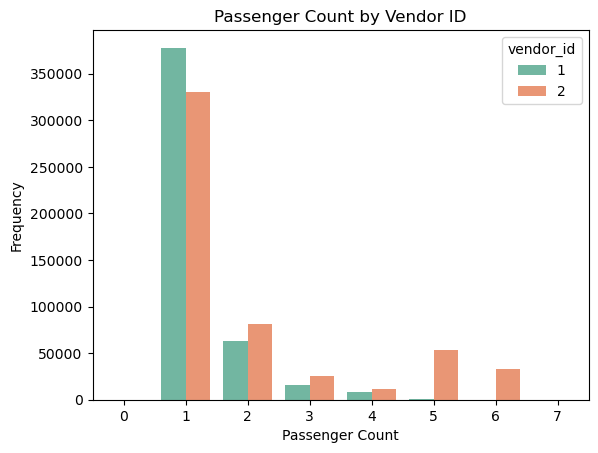

In [61]:
sns.countplot(x='passenger_count', hue='vendor_id', data=df, palette="Set2")
plt.title("Passenger Count by Vendor ID")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()

In [56]:
print('Minimum passenger count:', df['passenger_count'].min())
print('Maximum passenger count:', df['passenger_count'].max())

Minimum passenger count: 0
Maximum passenger count: 7


# Feature Engineering Features 

### 1- Haversine_Distance

In [150]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate Haversine distance (in km) between two sets of GPS coordinates.
    """
    R = 6371  # Earth's radius in km

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2

    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

df['distance'] = haversine_distance(
        df['pickup_latitude'],
        df['pickup_longitude'],
        df['dropoff_latitude'],
        df['dropoff_longitude']
    )

In [151]:
print('Minimum distance:', df['distance'].min())
print('Maximum distance:', df['distance'].max())

Minimum distance: 0.0
Maximum distance: 1240.9086766508526


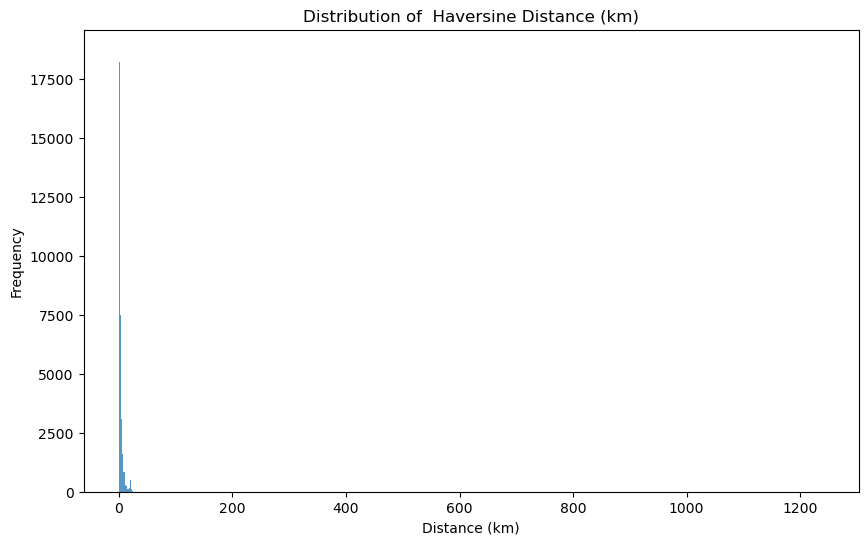

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(df['distance'])
plt.title("Distribution of  Haversine Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
# plt.xlim(0,30) #(most trips are < 30 km, avoids outlier skew)
plt.show()

### The full distribution reveals a large number of extreme values extending beyond 25 km, reaching up to 1200 km. These are unrealistic for NYC taxi trips

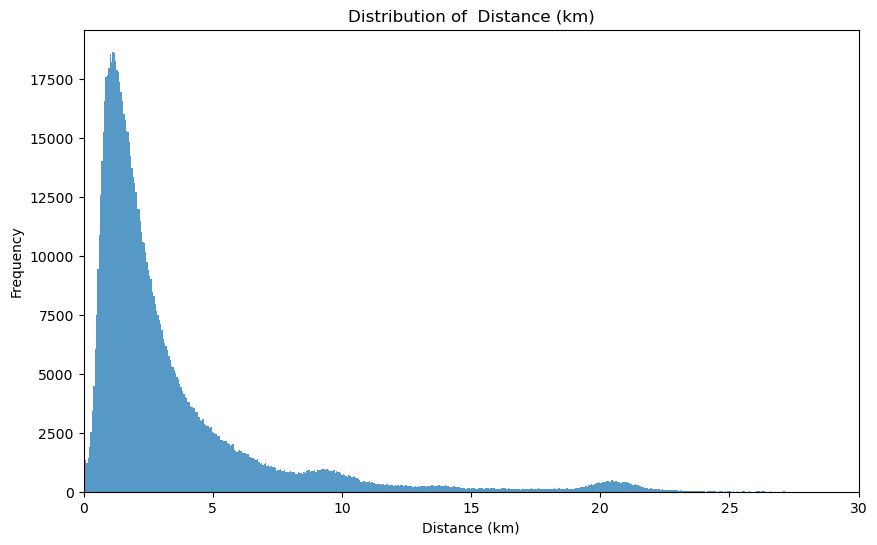

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(df['distance'])
plt.title("Distribution of  Haversine Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.xlim(0,30) #(most trips are < 30 km, avoids outlier skew)
plt.show()

**Note:**  For better visualization, I plotted the complete graph but limited the x-axis to 30 using xlim(0,30).

### Key Observations  

1. **Right-Skewed Distribution**  
   - Most trips are short-distance, concentrated between **0.5 km and 5 km**, with a strong peak around **1–2 km**.  
   - This pattern makes sense for NYC taxi trips, where most rides are relatively short.  

2. **Long Tail of Longer Trips**  
   - The distribution has a long right tail, with trips extending beyond **25 km**.  
   - These extreme values are likely **outliers**.  


### 2- manhattan_distance

In [152]:
df['manhattan_distance'] = (
      abs(df['pickup_latitude'] - df['dropoff_latitude']) +
      abs(df['pickup_longitude'] - df['dropoff_longitude'])
  ) * 111  # Convert to km approximately

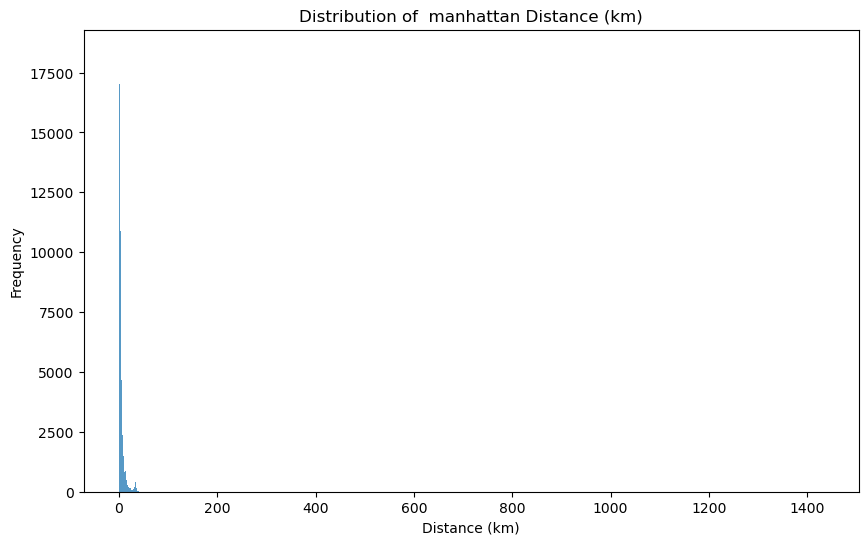

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(df['manhattan_distance'])
plt.title("Distribution of  manhattan Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
# plt.xlim(0,30) #(most trips are < 30 km, avoids outlier skew)
plt.show()

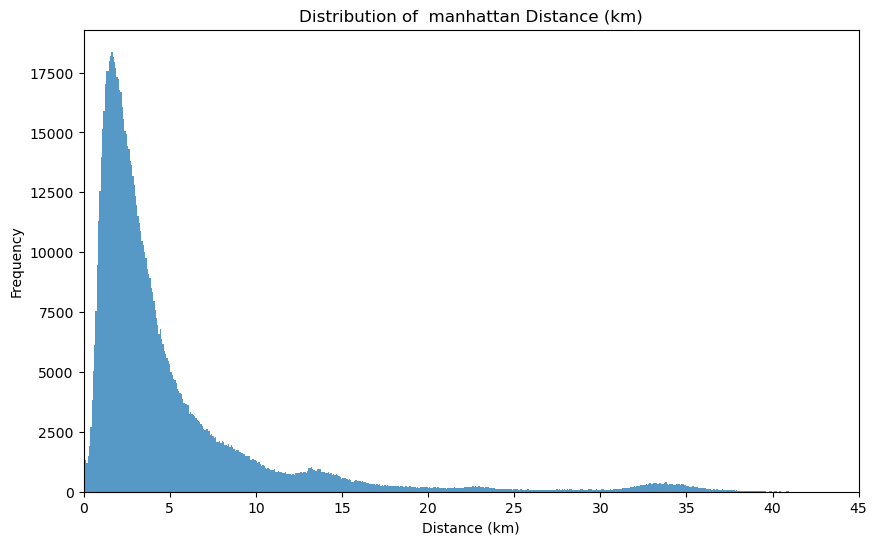

In [155]:
plt.figure(figsize=(10,6))
sns.histplot(df['manhattan_distance'])
plt.title("Distribution of  manhattan Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.xlim(0,45) #(most trips are < 30 km, avoids outlier skew)
plt.show()

### 3- Speed

In [92]:
df['speed_kmh'] =  ((df['distance']) / (df['trip_duration'] / 3600))


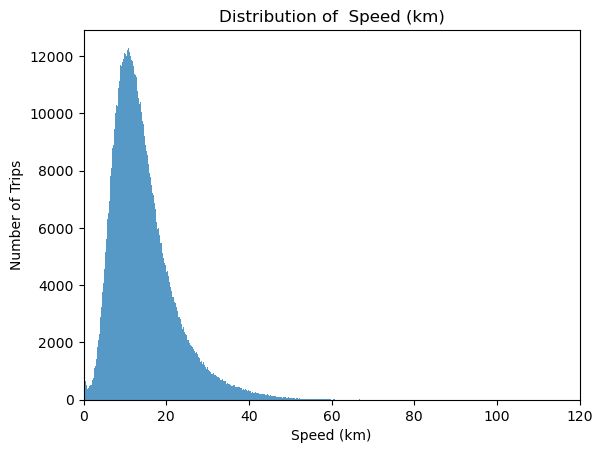

In [73]:
sns.histplot(df['speed_kmh'])
plt.title("Distribution of  Speed (km)")
plt.xlabel("Speed (km)")
plt.ylabel("Frequency")
plt.xlim(0,120)
plt.show()

**Right-Skewed Distribution:**  
1-The majority of trips have speeds between 5 km/h and 25 km/h, with a peak around 12–15 km/h.  
2-This pattern makes sense in the context of traffic at any city, heavy traffic and frequent stops usually keep taxi speeds low  
**Long Tail of High Speeds:**  
1-The distribution extends beyond 40 km/h, with some trips exceeding 60 km/h and even over 100 km/h.  
2-These extreme values are unrealistic for NYC taxi trips and are likely outliers that could mislead the model.


In [93]:
df['speed_range'] = pd.cut(
        df['speed_kmh'],
        bins=[0, 5, 15, 25, 40, 100],
        labels=['very_slow', 'slow', 'medium', 'fast', 'very_fast'],
        include_lowest=True
    )

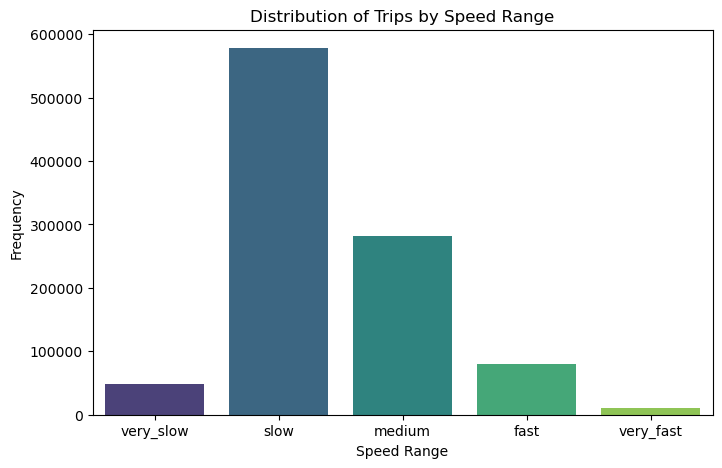

In [94]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="speed_range", palette="viridis", order=df['speed_range'].cat.categories)
plt.title("Distribution of Trips by Speed Range")
plt.xlabel("Speed Range")
plt.ylabel("Frequency")
plt.show()


# Correlation Analysis

In [7]:
def plot_corr_matrix(df, title):
    """
    Plots a correlation heatmap for numeric features in df.
    """
    corr = df.corr(numeric_only=True)   # only numeric features
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title(title, fontsize=14)
    plt.show()

In [8]:
def plot_target_corr(df, target, title):
    """
    Plot correlation of all numeric features with target only.
    """
    corr = df.corr(numeric_only=True)[[target]].sort_values(by=target, ascending=False)

    plt.figure(figsize=(6, len(corr) * 0.4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title(f"Correlation with {target} - {title}")
    plt.show()


### 1- Raw Features correlation analysis

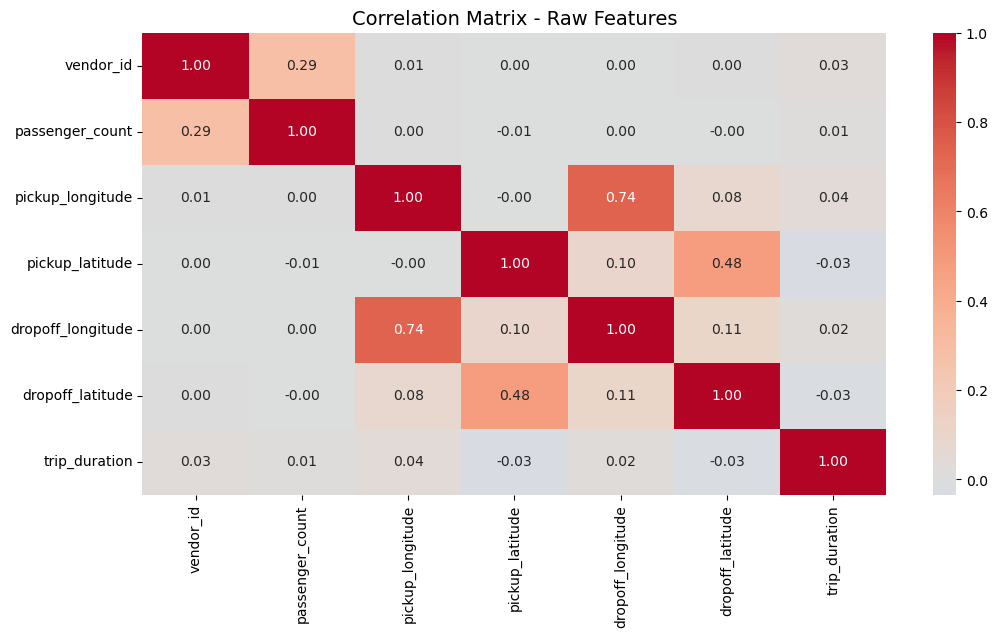

In [120]:
plot_corr_matrix(df, "Correlation Matrix - Raw Features")

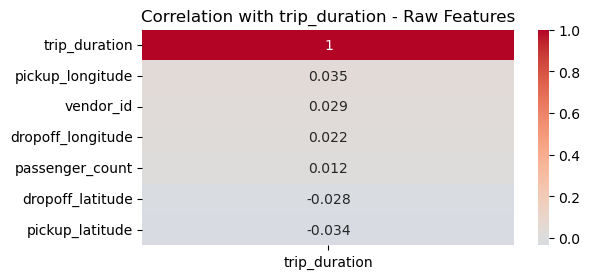

In [119]:
plot_target_corr(df, "trip_duration", "Raw Features")

### 1- final model correlation matrix

In [5]:
df_base = apply_feature_engineering(df)

Index(['start_hour', 'day_of_week', 'weekend_day', 'month',
       'which_part_of_day_evening_rush', 'which_part_of_day_midday',
       'which_part_of_day_morning_rush', 'which_part_of_day_night',
       'haversine_distance', 'manhattan_distance', 'log_distance',
       'log_trip_duration'],
      dtype='object')


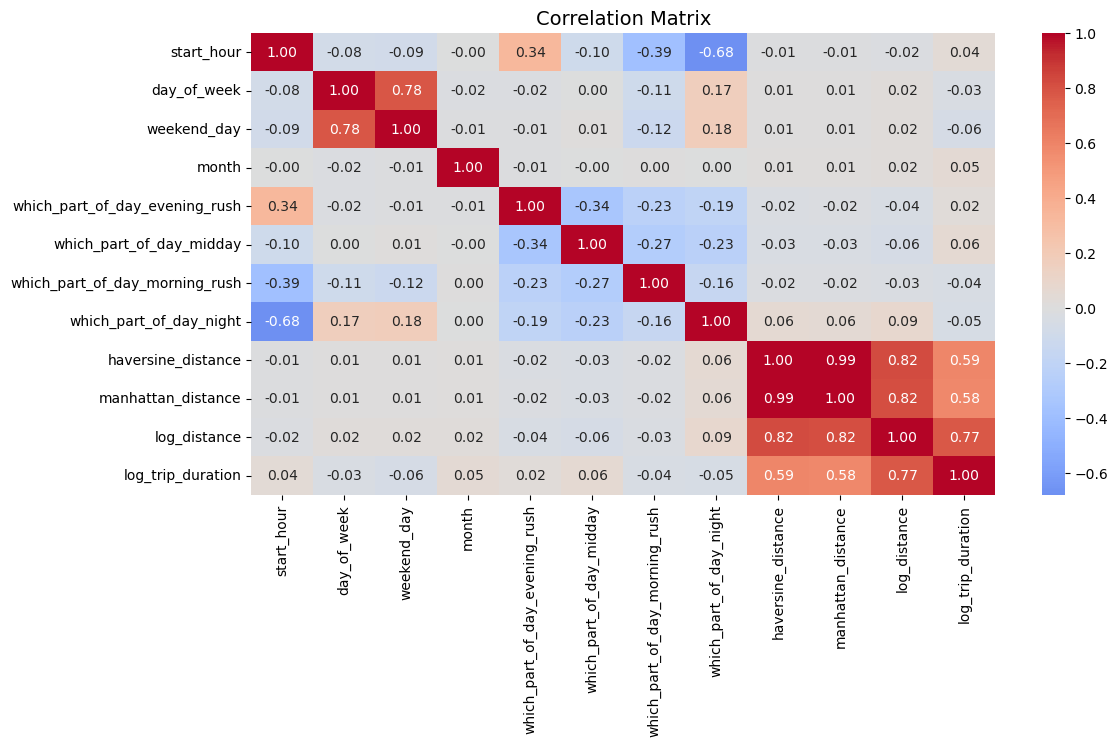

In [12]:
plot_corr_matrix(df_base, "Correlation Matrix")

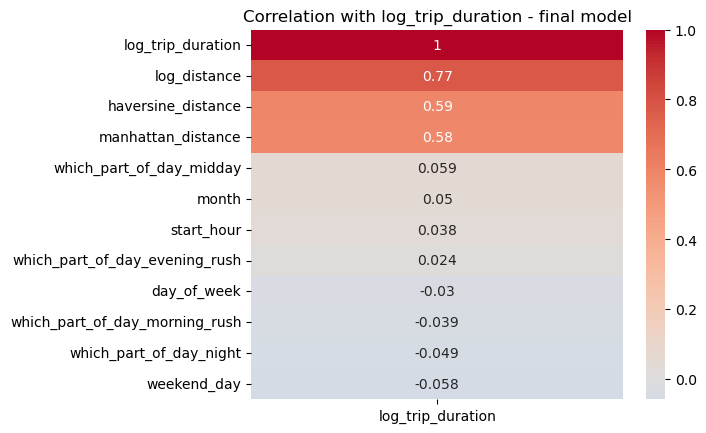

In [13]:
plot_target_corr(df_base, "log_trip_duration", "final model")